In [ ]:
# Problem: spam email detection

In [ ]:
# data comes from https://archive.ics.uci.edu/dataset/94/spambase

In [18]:
import numpy as np
import pandas as pd

# Load the Spambase dataset
data = pd.read_csv('spambase.data')

# Fill missing values with the mean of each column
data = data.fillna(data.mean())

column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
    'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
    'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will',
    'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
    'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money',
    'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650',
    'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
    'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference',
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$',
    'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'spam'
]

# Assign column names to the dataset
data.columns = column_names


In [20]:
data.spam.value_counts()

0    2788
1    1812
Name: spam, dtype: int64

In [23]:
# Perform statistical analysis
statistics = data.describe()
print(statistics)

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4600.000000        4600.000000    4600.000000   4600.000000   
mean         0.104576           0.212922       0.280578      0.065439   
std          0.305387           1.290700       0.504170      1.395303   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4600.000000     4600.000000       4600.000000         4600.000000   
mean        0.312222        0.095922          0.114233            0.105317   
std         0.672586        0.273850          0.391480            0.401112   
min         0.000000        0.

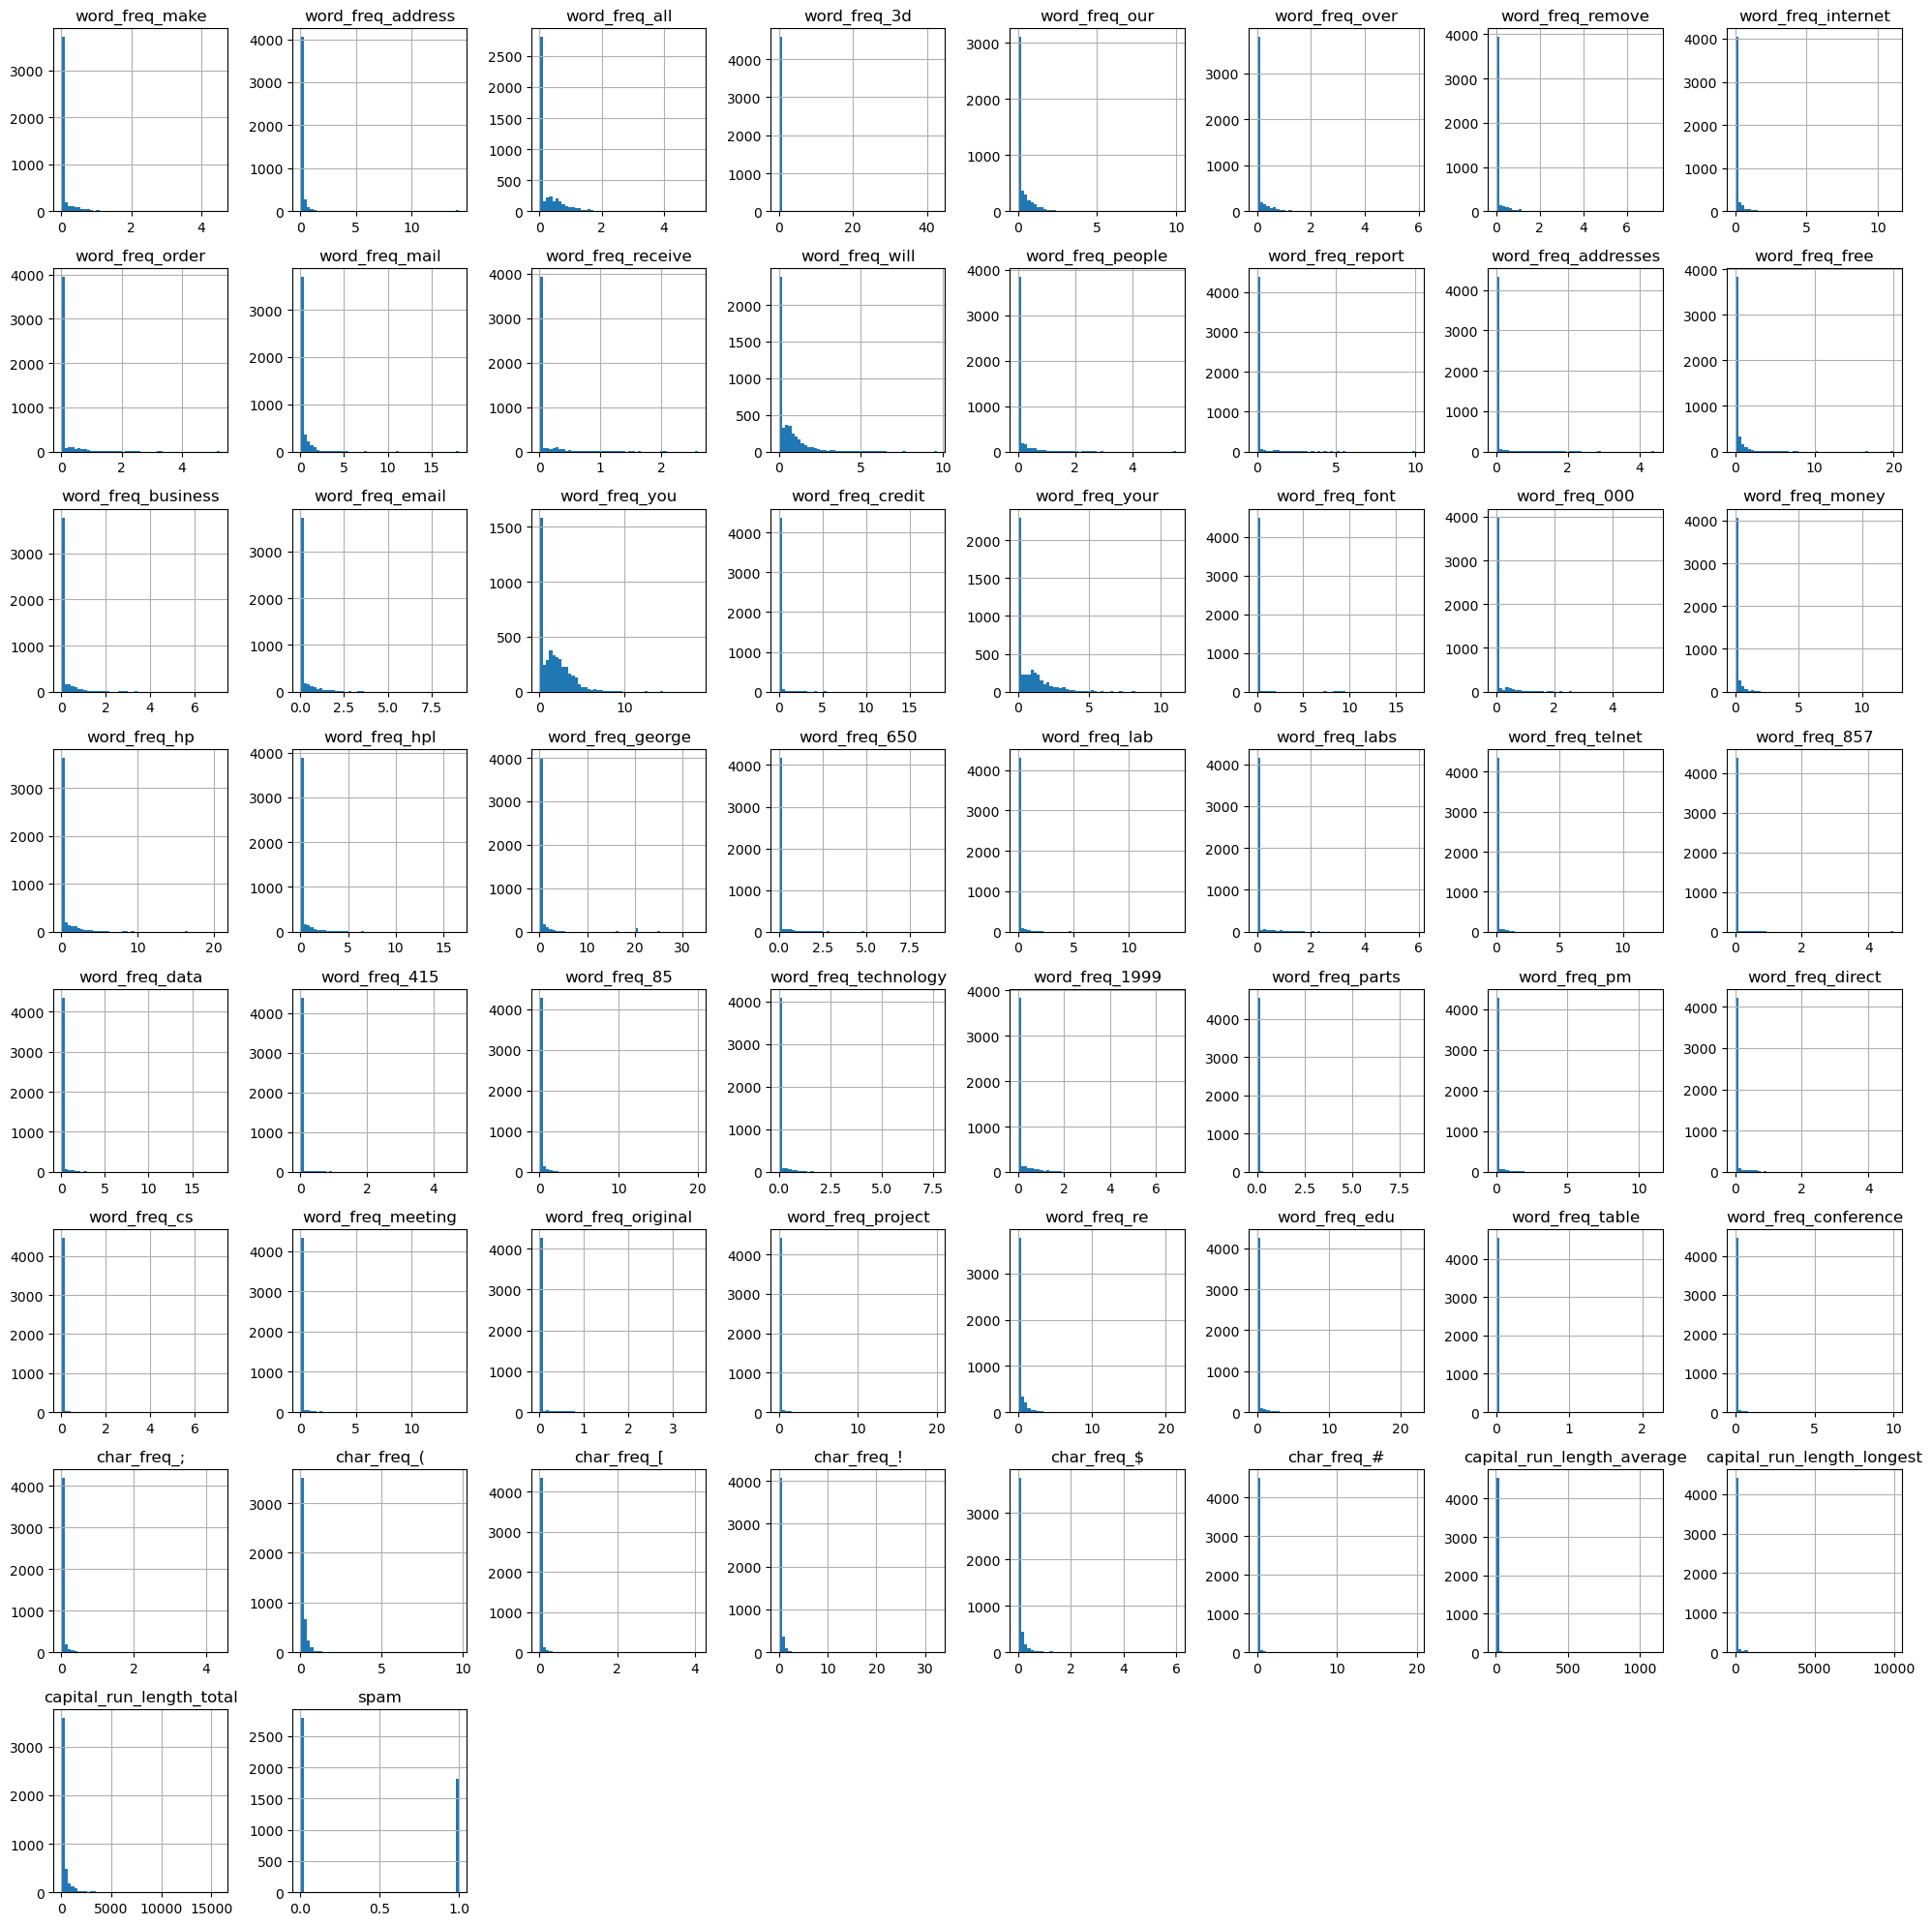

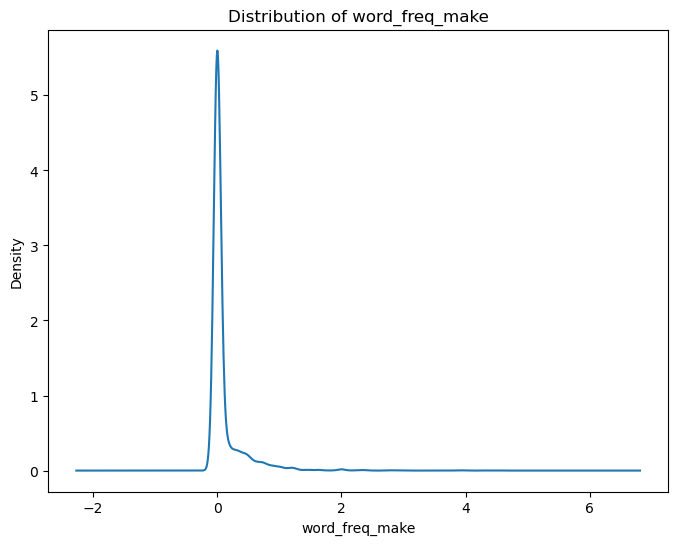

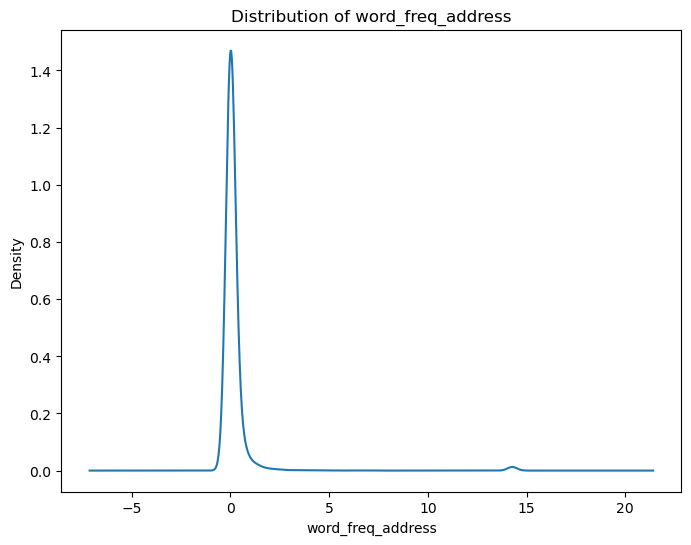

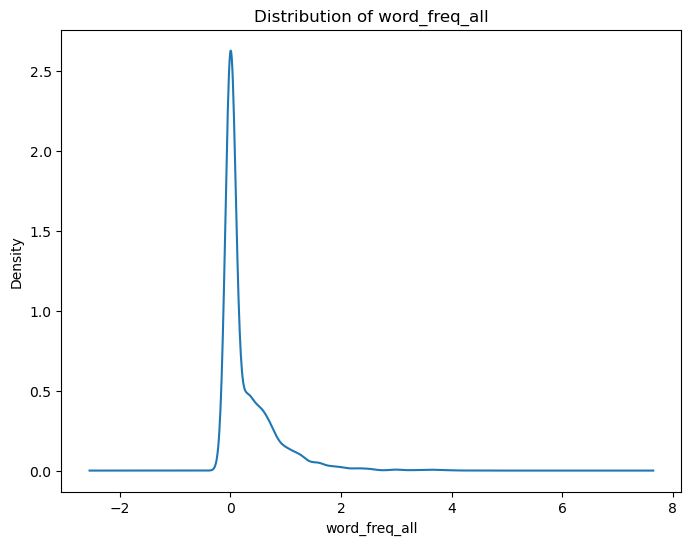

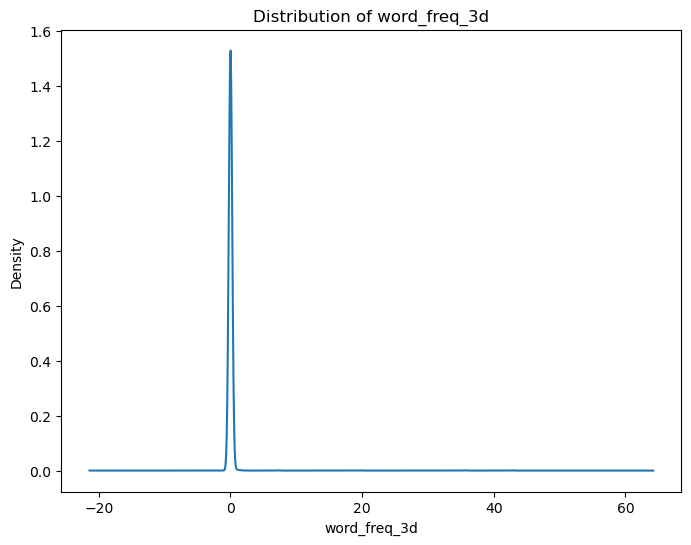

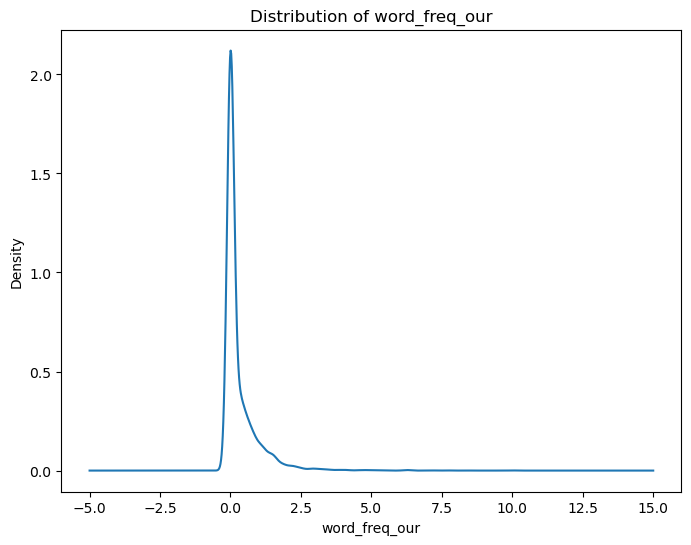

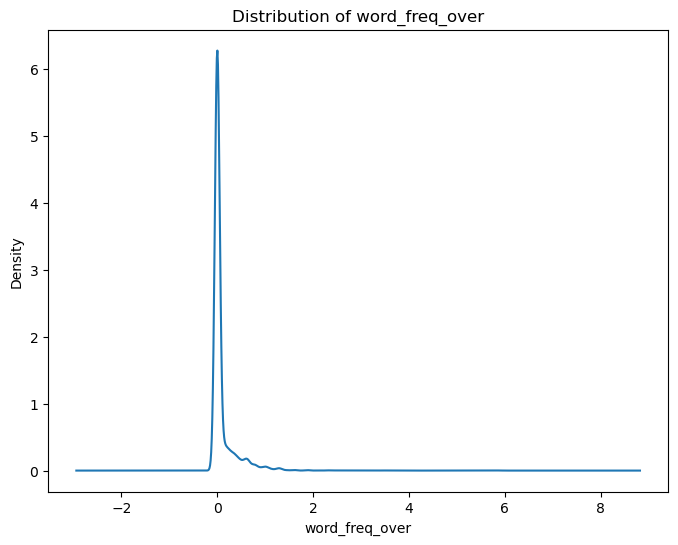

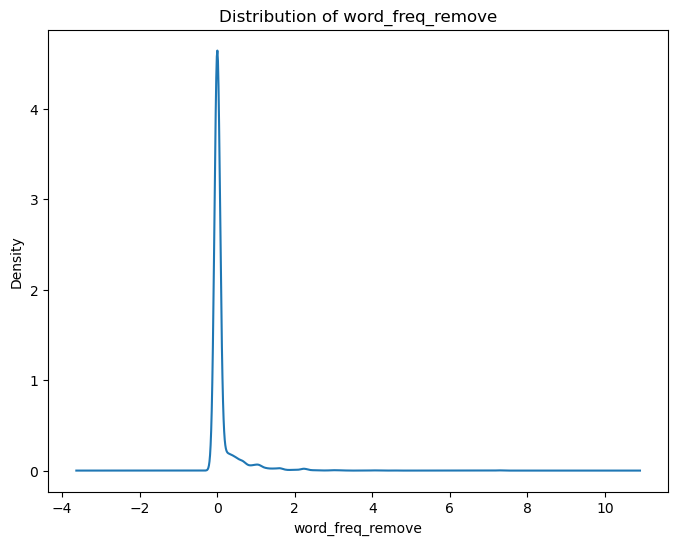

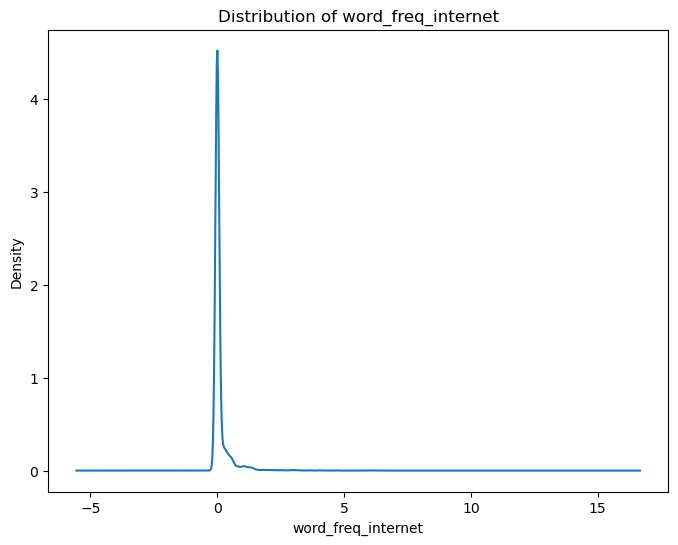

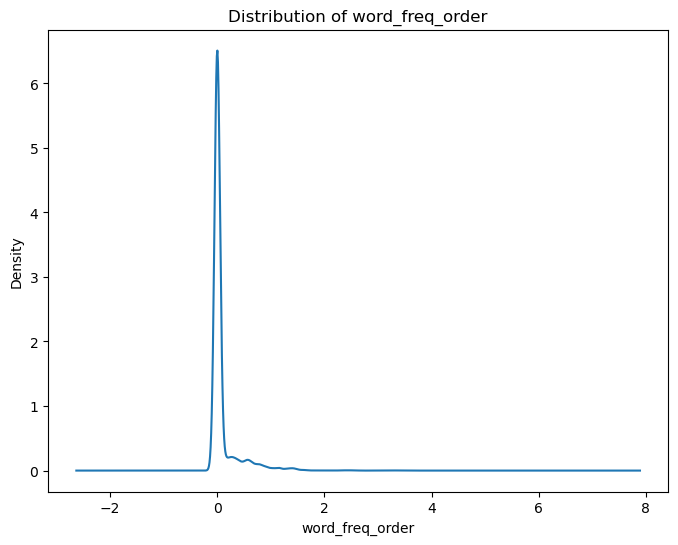

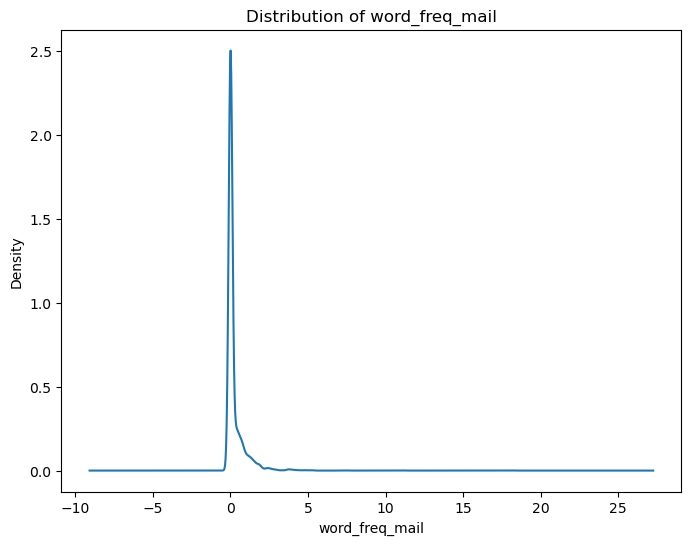

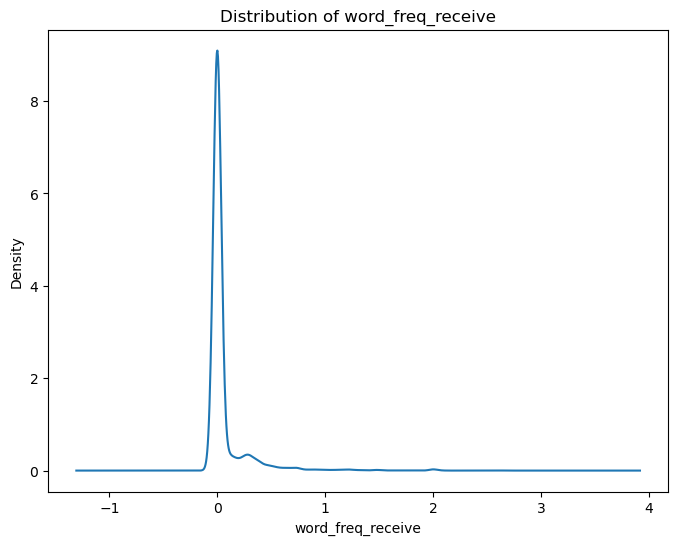

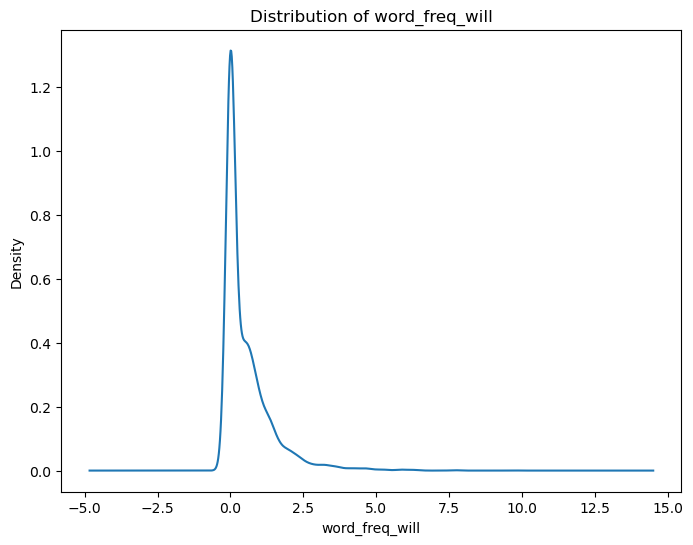

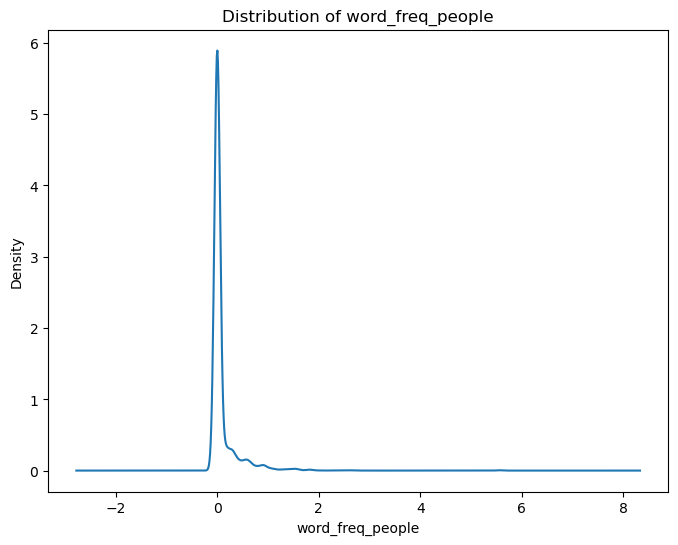

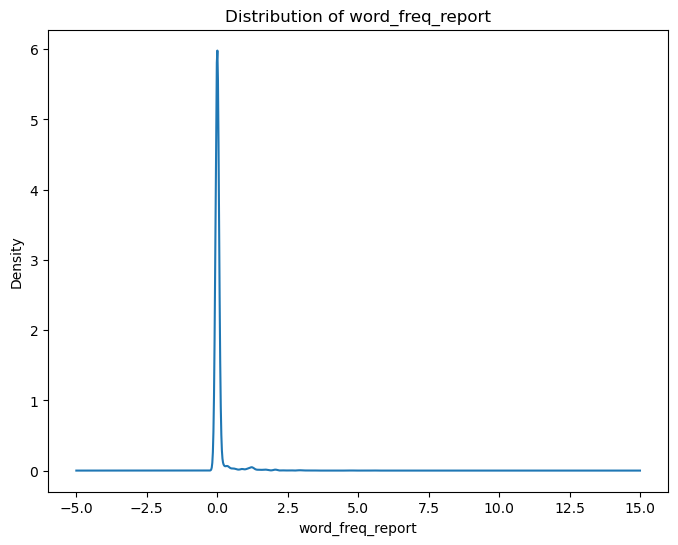

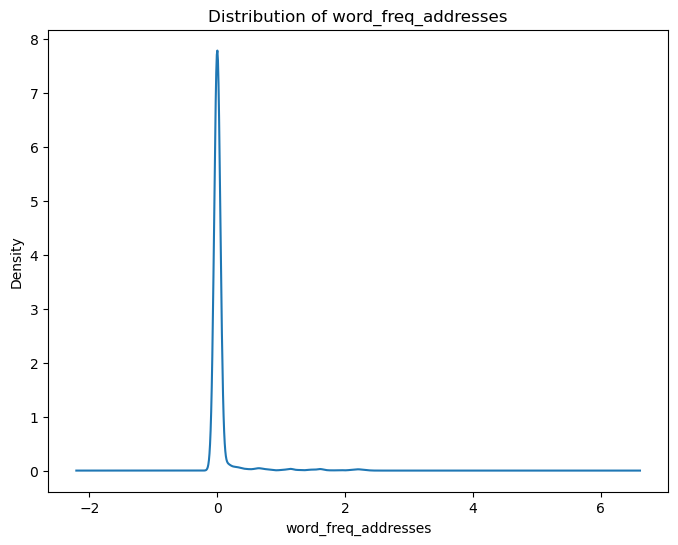

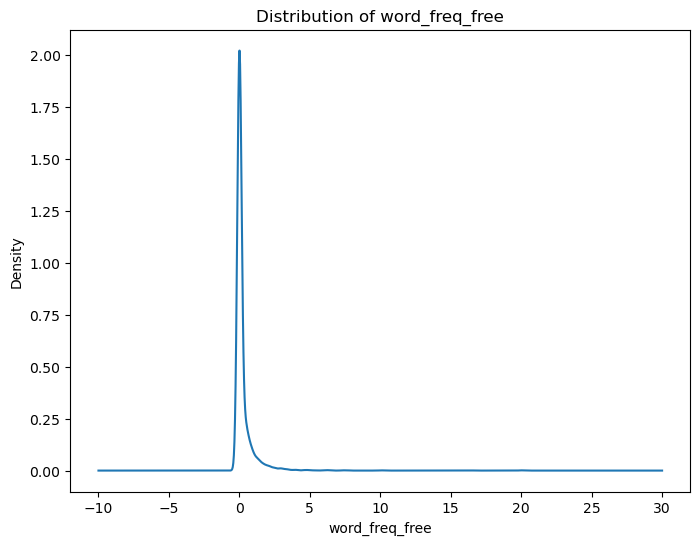

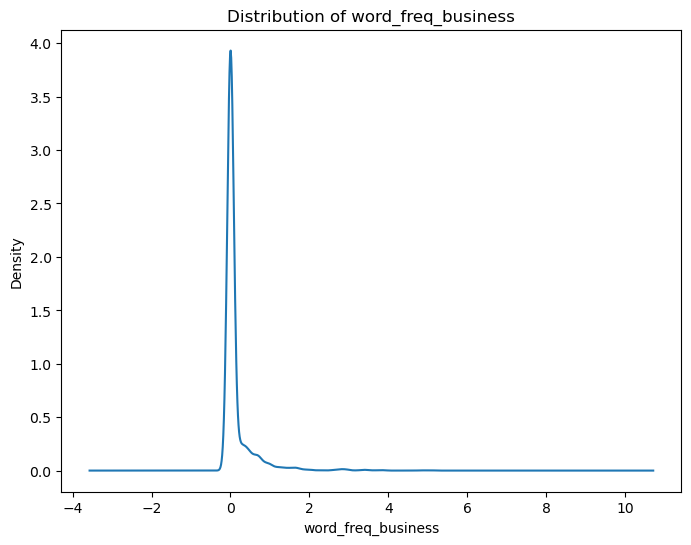

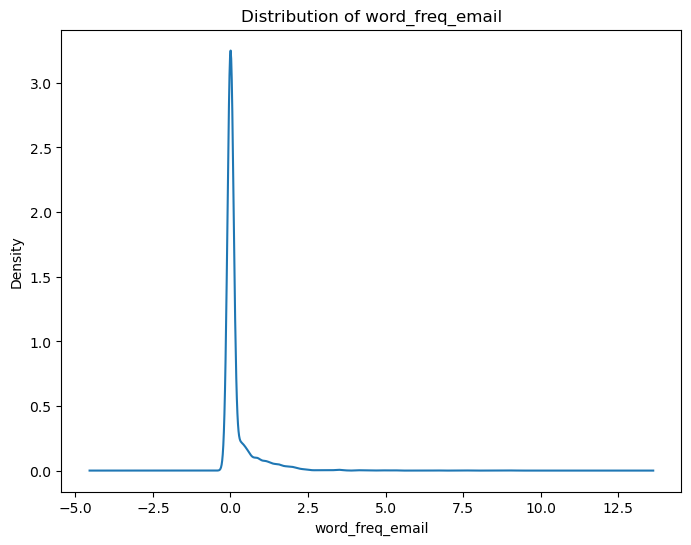

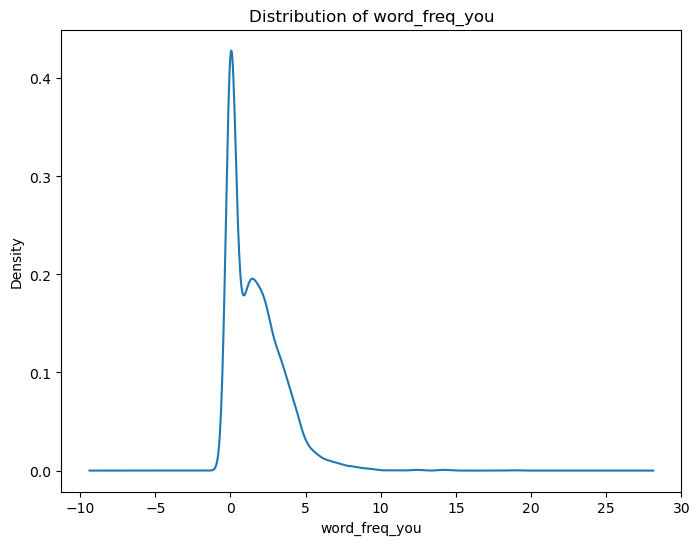

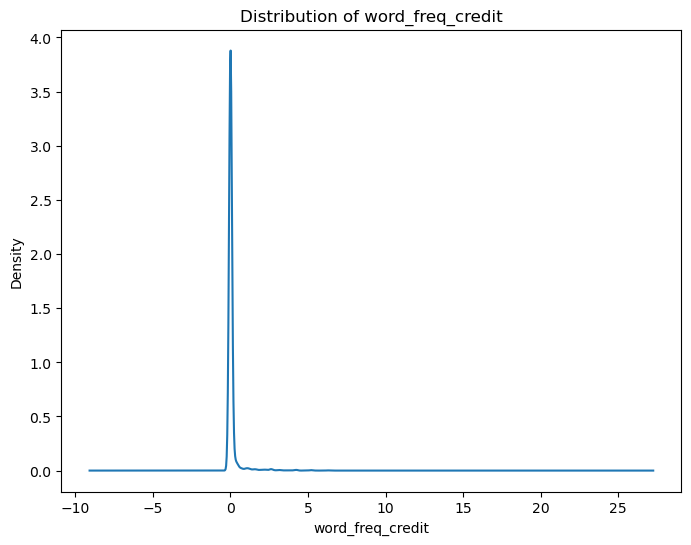

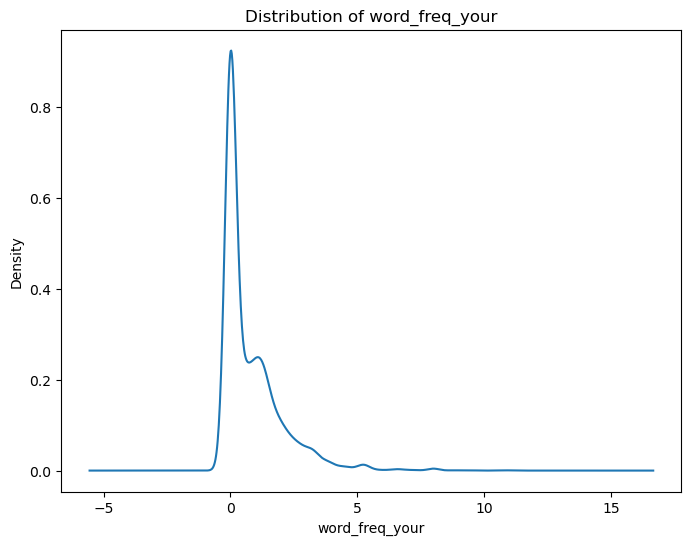

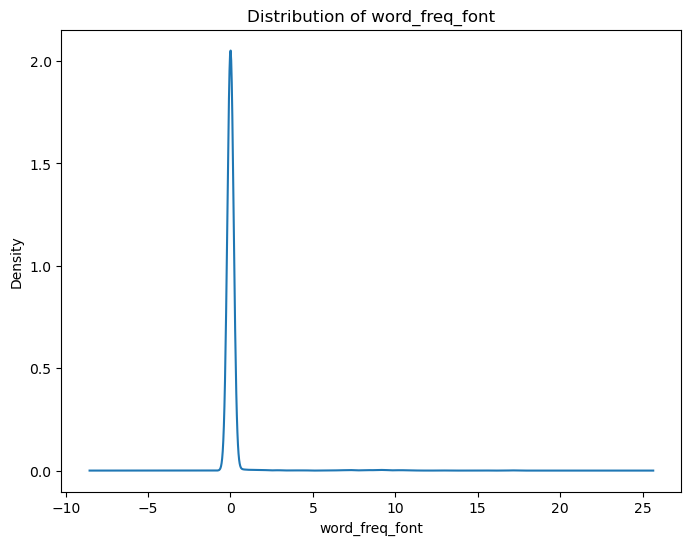

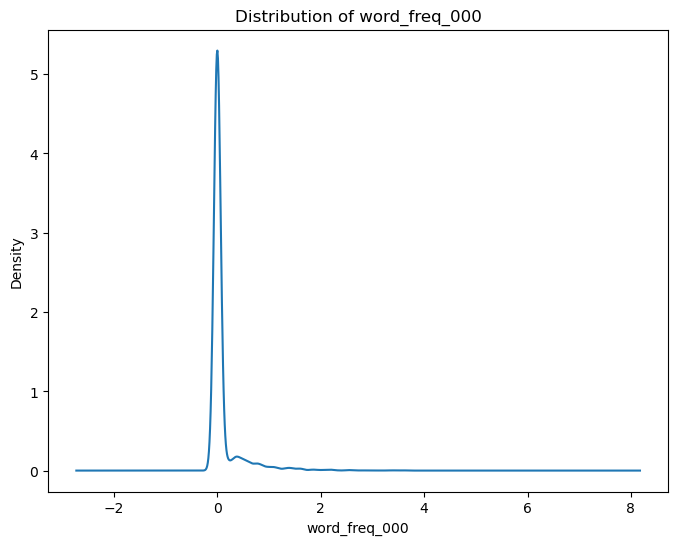

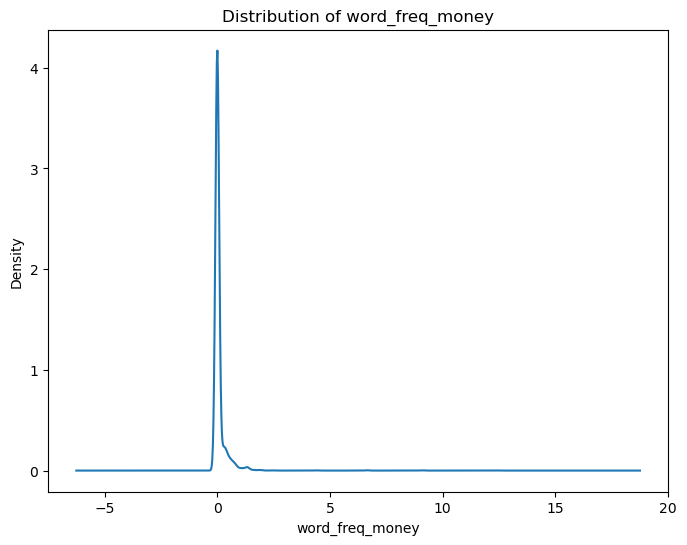

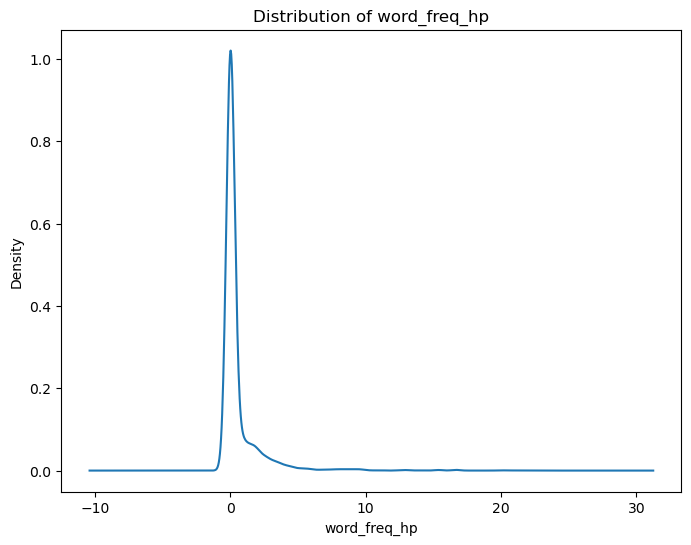

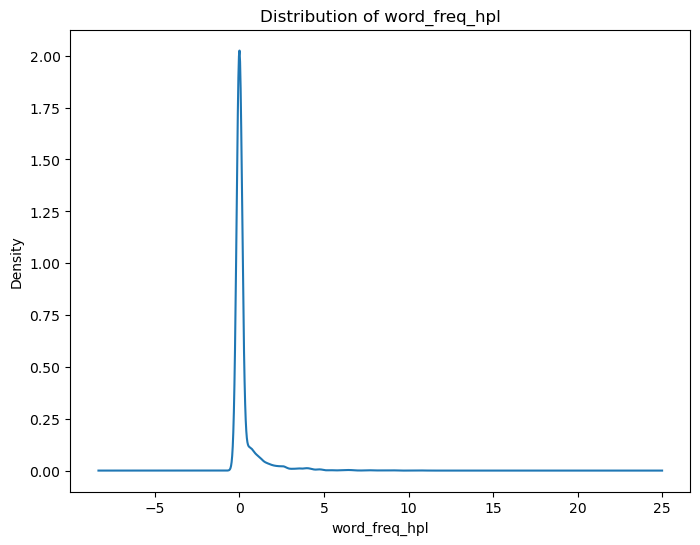

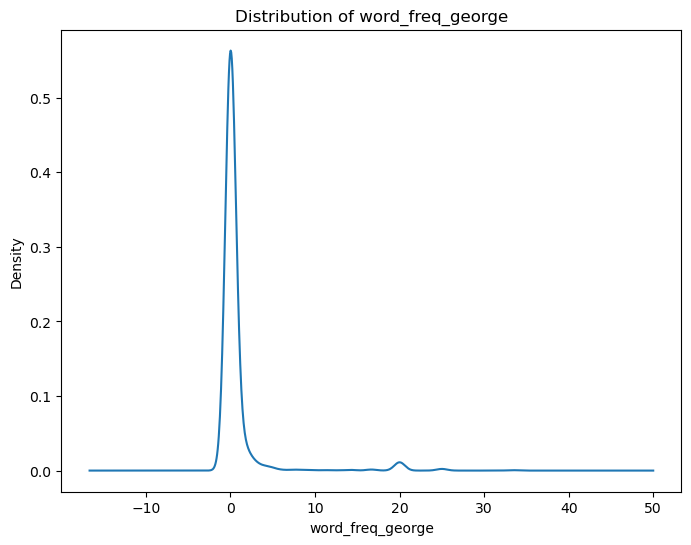

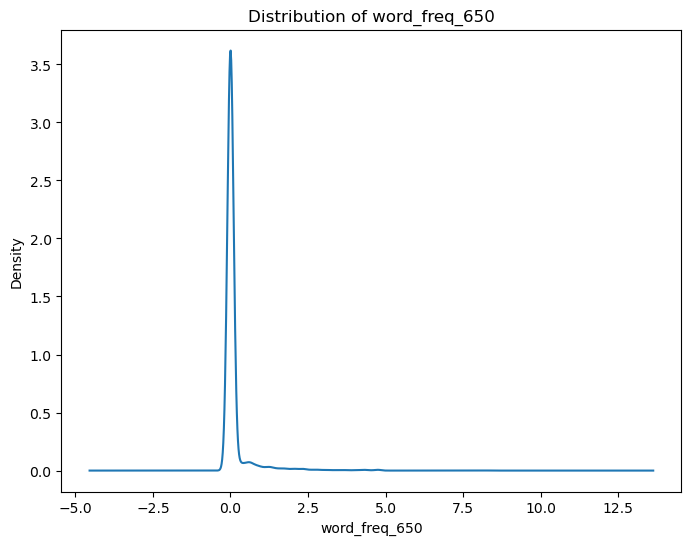

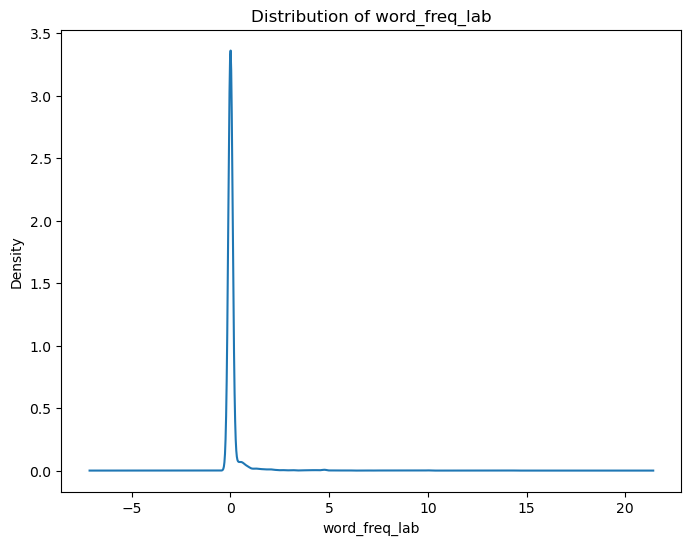

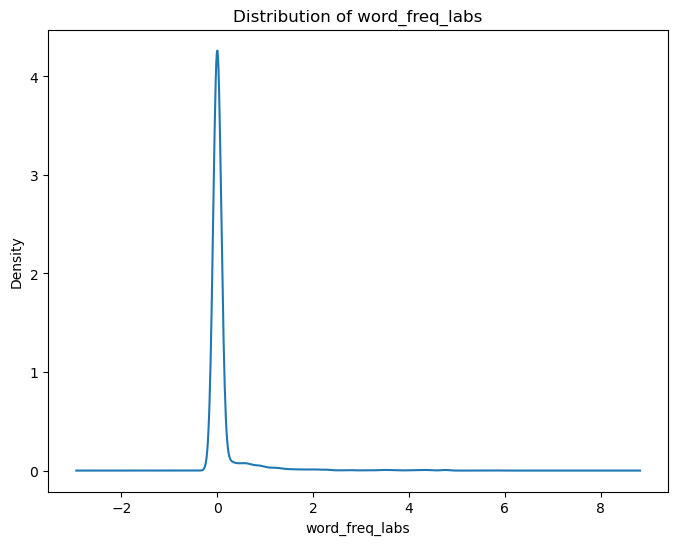

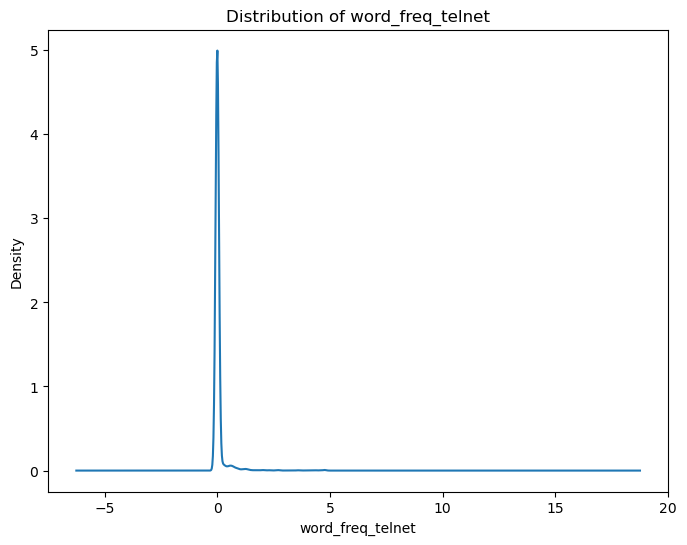

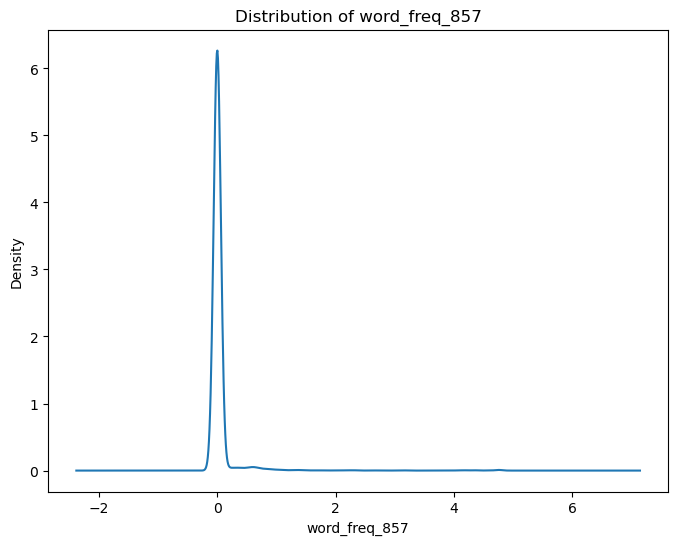

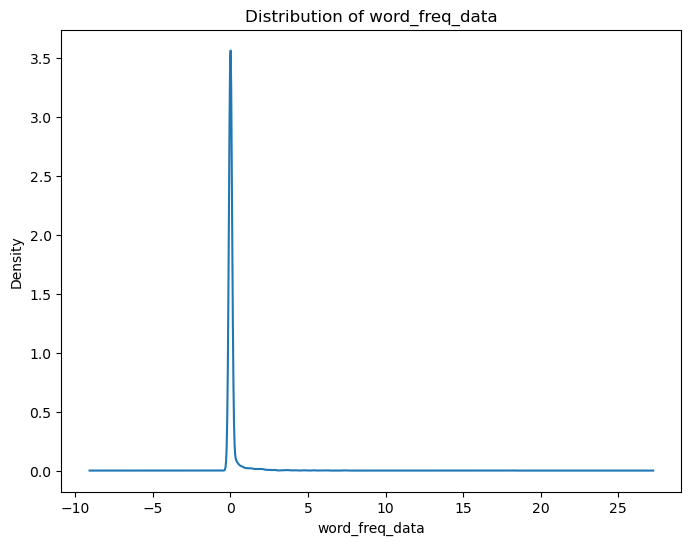

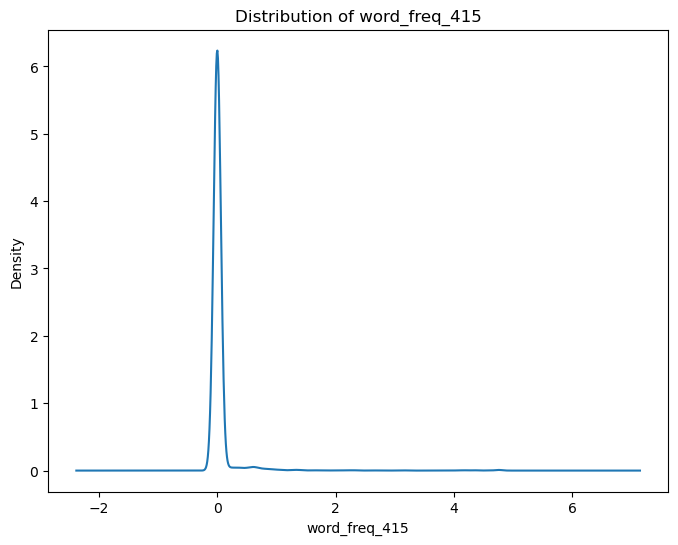

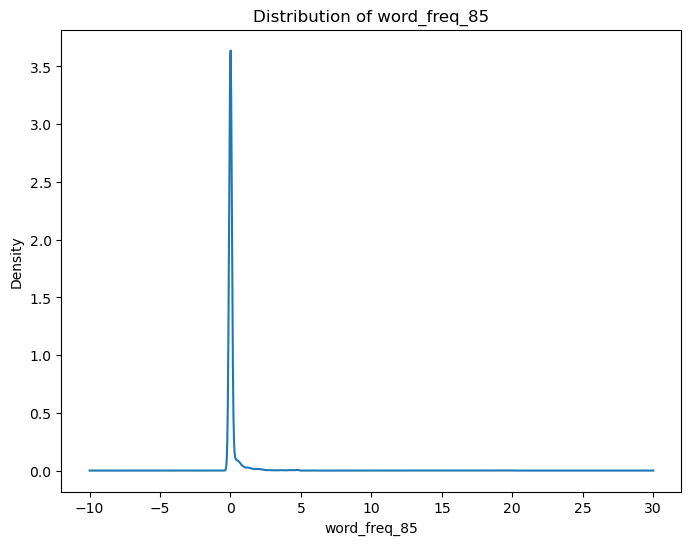

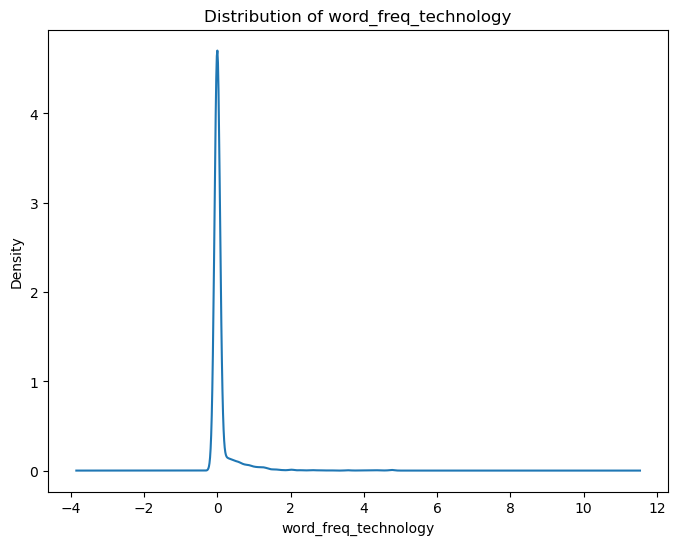

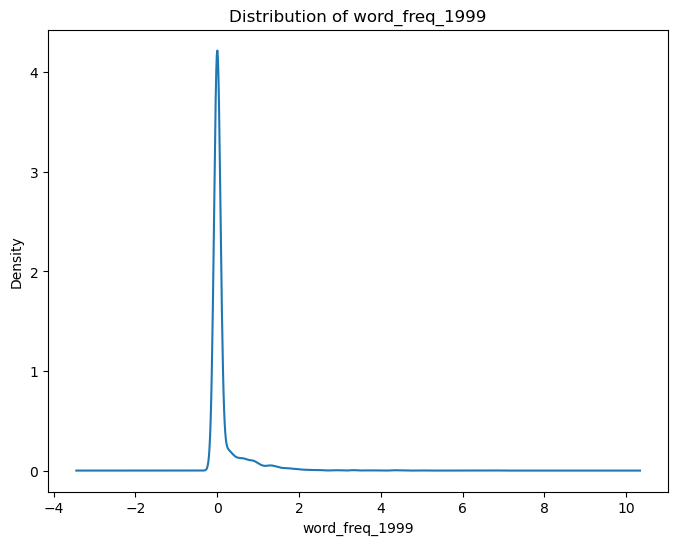

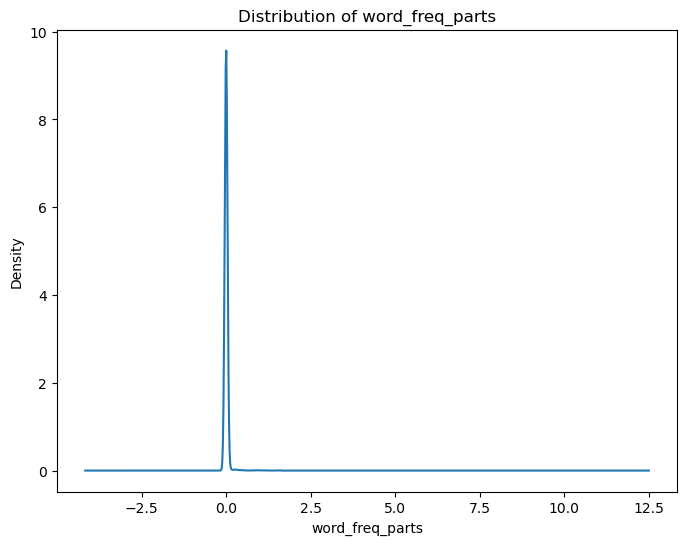

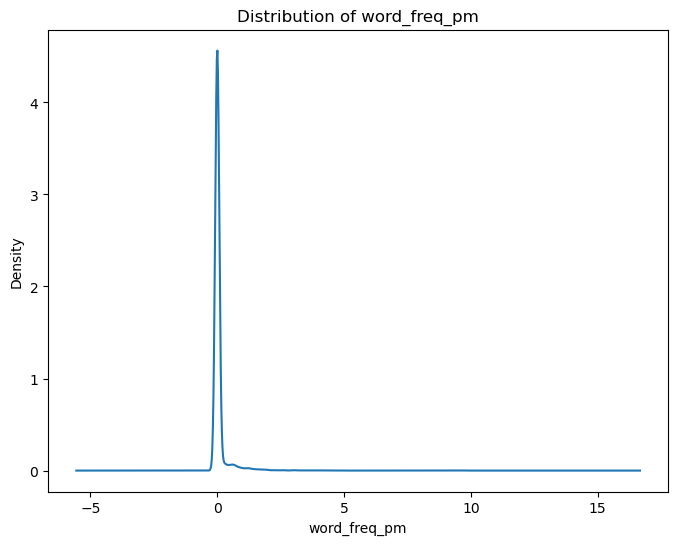

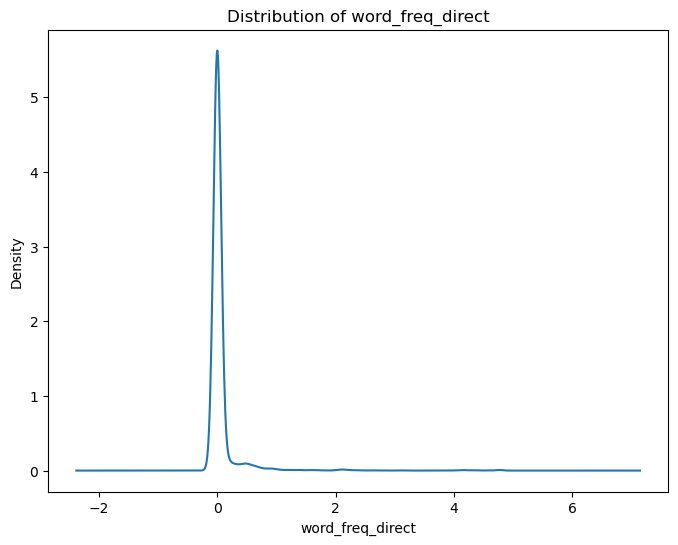

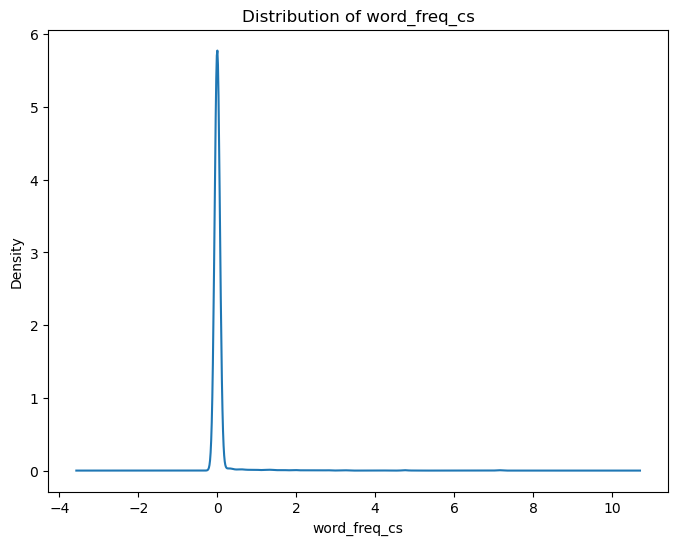

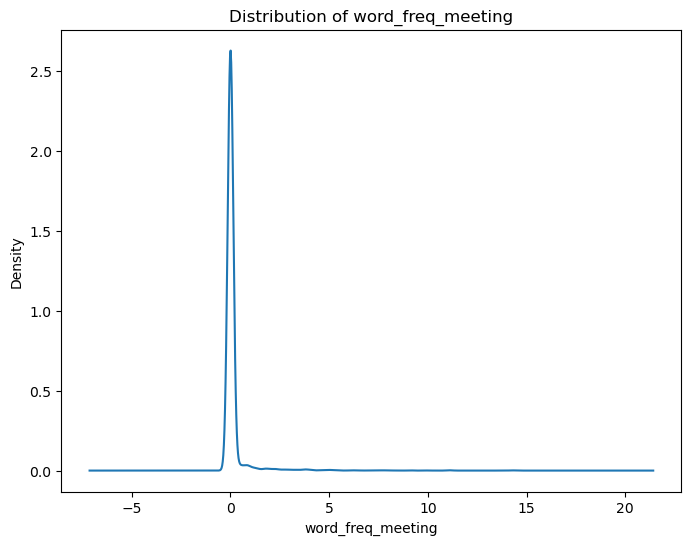

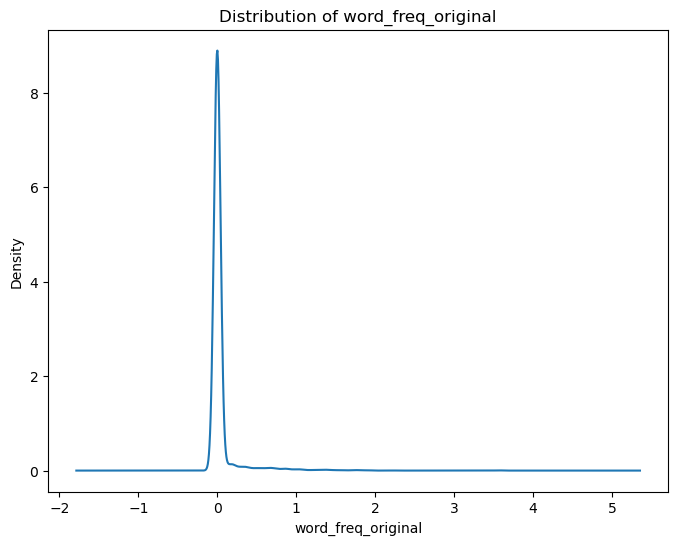

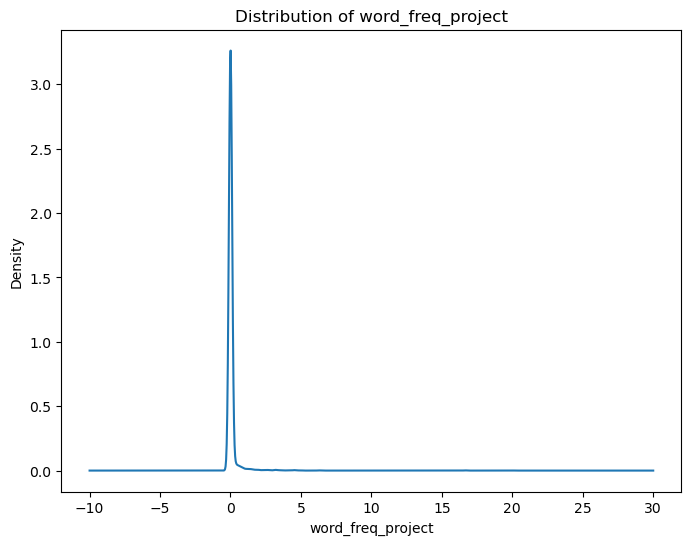

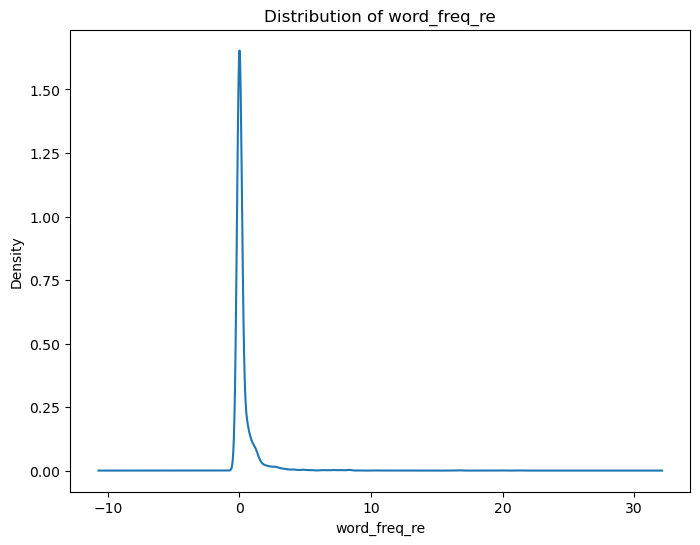

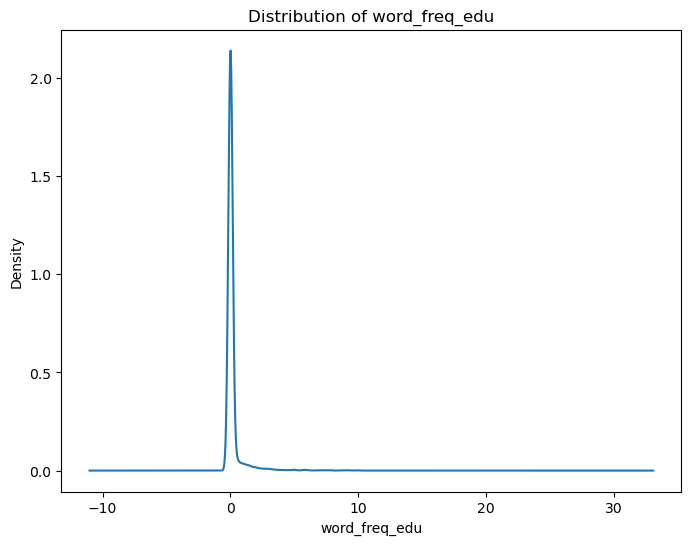

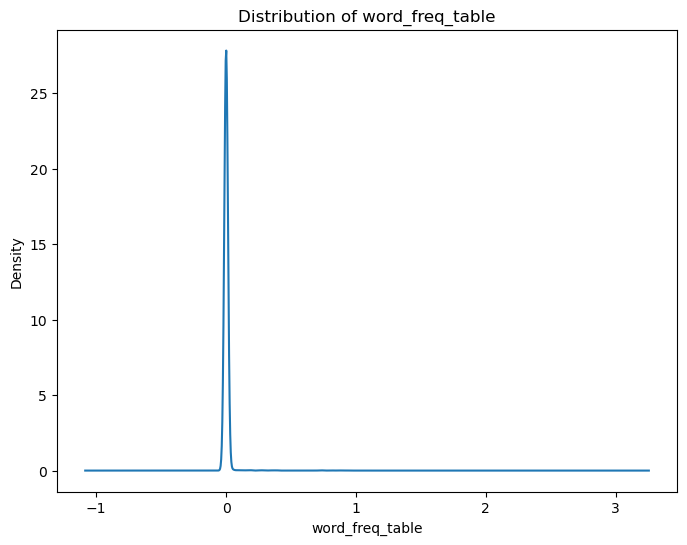

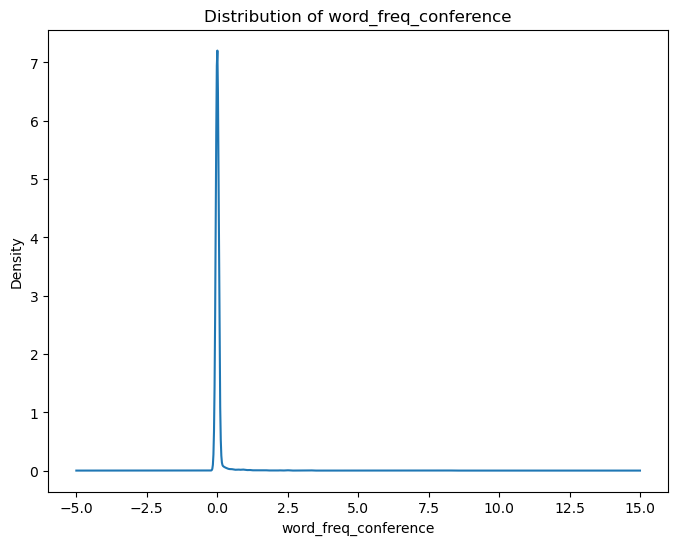

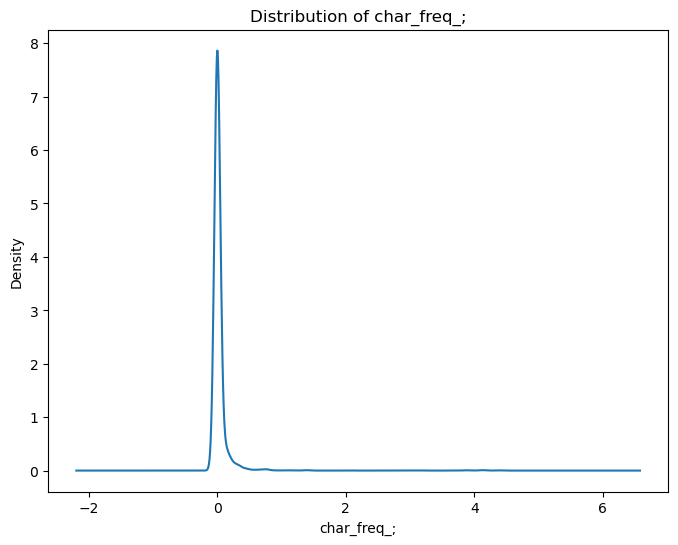

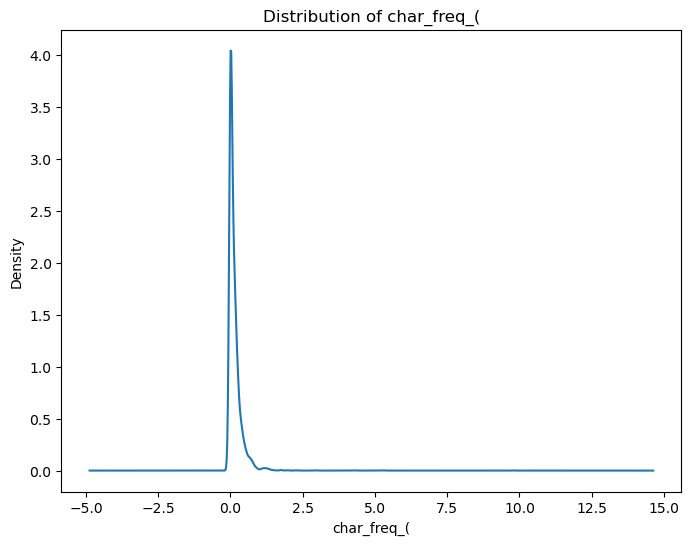

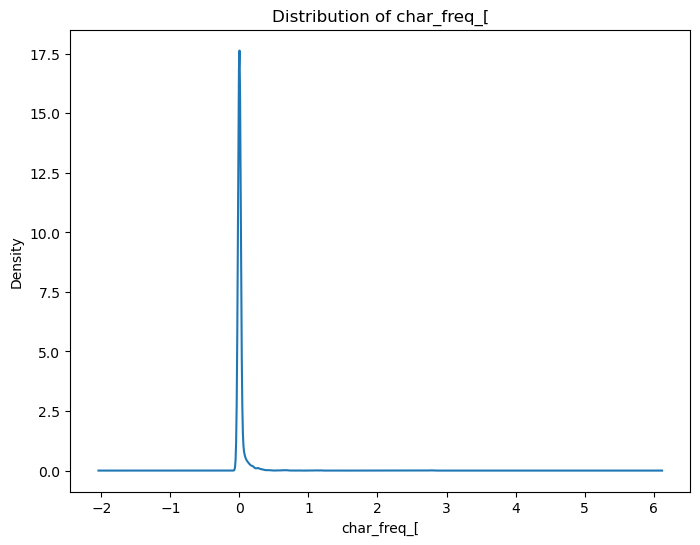

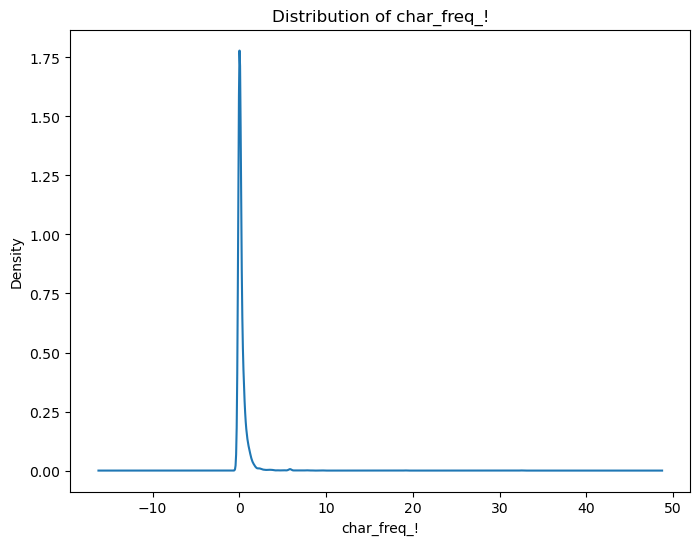

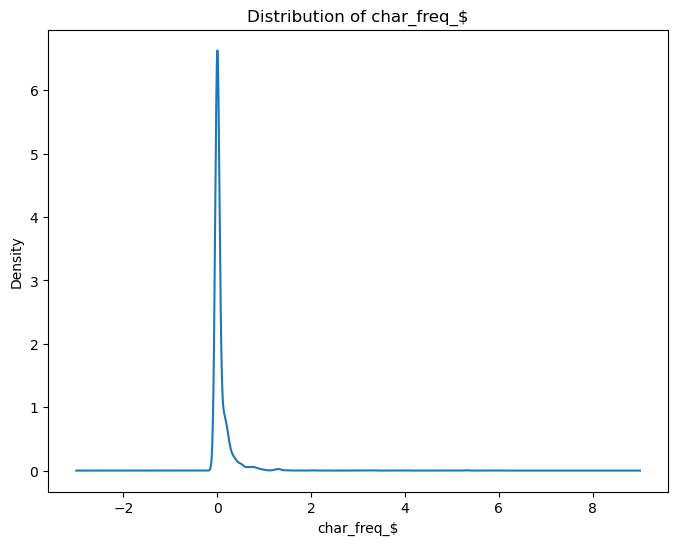

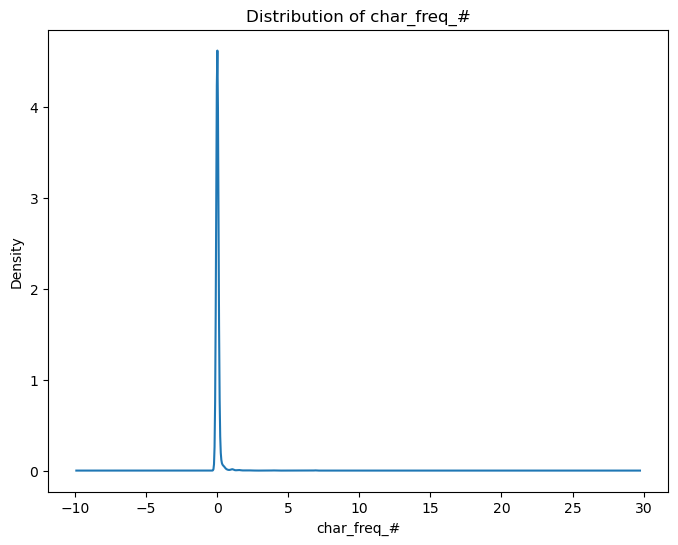

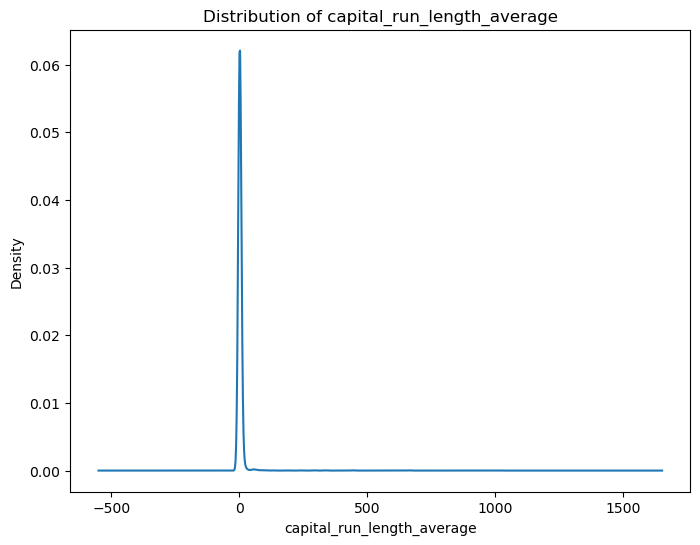

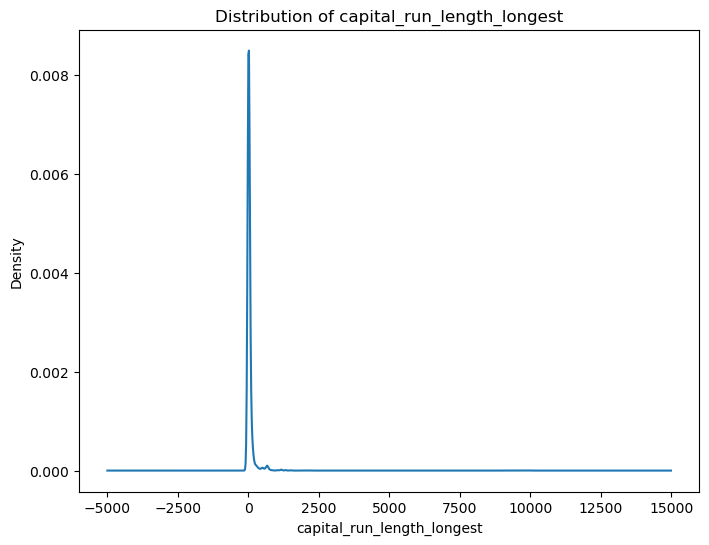

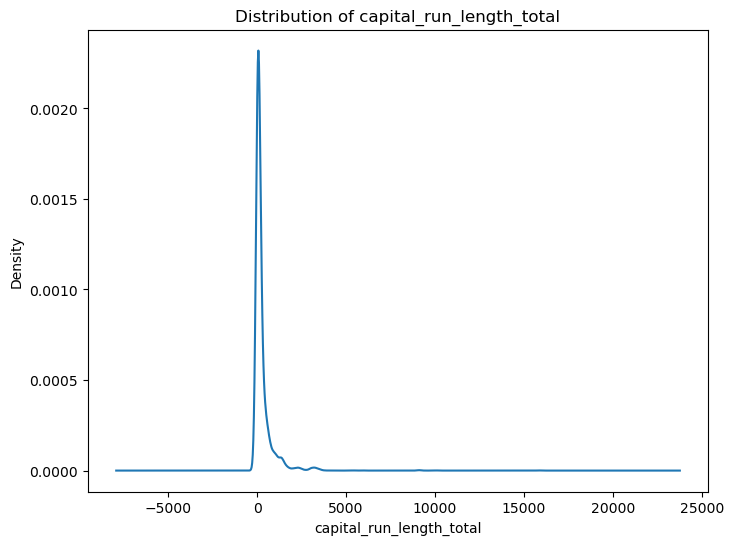

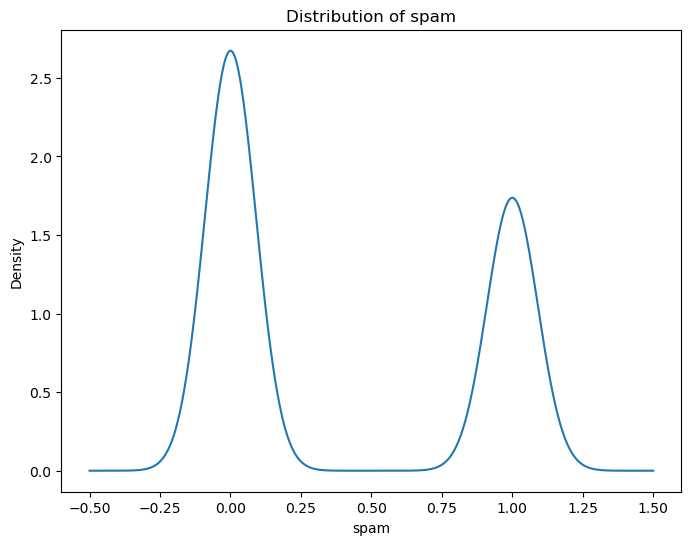

In [27]:
import matplotlib.pyplot as plt

# Plot histogram for each feature
data.hist(figsize=(20, 20), bins=50)
plt.tight_layout()
plt.show()

# Plot feature distribution
for feature in column_names:
    plt.figure(figsize=(8, 6))
    data[feature].plot(kind='density')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature}')
    plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the dataset into features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Naive Bayes Classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Train the SVM Classifier
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the testing set
nb_predictions = naive_bayes.predict(X_test)
svm_predictions = svm.predict(X_test)

# Evaluate the classifiers
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# Print evaluation metrics
print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-Score:", nb_f1)

print("\nSVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)

Naive Bayes Classifier:
Accuracy: 0.7663043478260869
Precision: 0.7450980392156863
Recall: 0.6820512820512821
F1-Score: 0.7121820615796519

SVM Classifier:
Accuracy: 0.7184782608695652
Precision: 0.7787234042553192
Recall: 0.46923076923076923
F1-Score: 0.5856
